# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns
# Show plots in jupyter notebook
%matplotlib inline
# Set plot style
sns.set(color_codes=True)
# Set maximum number of columns to be displayed
pd.set_option('display.max_columns', 100)

In [2]:
PICKLE_TRAIN_DIR = os.path.join("/home/miki/Desktop/Docker/BCG/Customer-Churning-Analysis/data/final", "client.pkl")
PICKLE_HISTORY_DIR = os.path.join("/home/miki/Desktop/Docker/BCG/Customer-Churning-Analysis/data/final", "price.pkl")

---
## 2. Load data

In [3]:
price_df = pd.read_pickle(PICKLE_HISTORY_DIR)
client_df = pd.read_pickle(PICKLE_TRAIN_DIR)

In [4]:
mean_year = price_df.groupby(["id"]).mean().reset_index()
mean_6m = price_df[price_df["price_date"] > "2015-06-01"].groupby(["id"]).mean().reset_index()
mean_3m = price_df[price_df["price_date"] > "2015-10-01"].groupby(["id"]).mean().reset_index()

/tmp/ipykernel_39746/3216473743.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_year = price_df.groupby(["id"]).mean().reset_index()
/tmp/ipykernel_39746/3216473743.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_6m = price_df[price_df["price_date"] > "2015-06-01"].groupby(["id"]).mean().reset_index()
/tmp/ipykernel_39746/3216473743.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_3m = price_

In [5]:
mean_year = mean_year.rename(index=str, columns={"price_off_peak_var": "mean_year_price_p1_var",
                                                    "price_peak_var": "mean_year_price_p2_var",
                                                    "price_mid_peak_var": "mean_year_price_p3_var",
                                                    "price_off_peak_fix": "mean_year_price_p1_fix",
                                                    "price_peak_fix": "mean_year_price_p2_fix",
                                                    "price_mid_peak_fix": "mean_year_price_p3_fix",})
mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]

In [6]:
mean_6m = mean_6m.rename(index=str, columns={"price_off_peak_var": "mean_year_price_p1_var",
                                                    "price_peak_var": "mean_year_price_p2_var",
                                                    "price_mid_peak_var": "mean_year_price_p3_var",
                                                    "price_off_peak_fix": "mean_year_price_p1_fix",
                                                    "price_peak_fix": "mean_year_price_p2_fix",
                                                    "price_mid_peak_fix": "mean_year_price_p3_fix",})
mean_6m["mean_year_price_p1"] = mean_6m["mean_year_price_p1_var"] + mean_6m["mean_year_price_p1_fix"]
mean_6m["mean_year_price_p2"] = mean_6m["mean_year_price_p2_var"] + mean_6m["mean_year_price_p2_fix"]
mean_6m["mean_year_price_p3"] = mean_6m["mean_year_price_p3_var"] + mean_6m["mean_year_price_p3_fix"]

In [7]:
mean_3m = mean_3m.rename(index=str, columns={"price_off_peak_var": "mean_year_price_p1_var",
                                                    "price_peak_var": "mean_year_price_p2_var",
                                                    "price_mid_peak_var": "mean_year_price_p3_var",
                                                    "price_off_peak_fix": "mean_year_price_p1_fix",
                                                    "price_peak_fix": "mean_year_price_p2_fix",
                                                    "price_mid_peak_fix": "mean_year_price_p3_fix",})
mean_3m["mean_year_price_p1"] = mean_3m["mean_year_price_p1_var"] + mean_3m["mean_year_price_p1_fix"]
mean_3m["mean_year_price_p2"] = mean_3m["mean_year_price_p2_var"] + mean_3m["mean_year_price_p2_fix"]
mean_3m["mean_year_price_p3"] = mean_3m["mean_year_price_p3_var"] + mean_3m["mean_year_price_p3_fix"]

In [8]:
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

In [9]:
price_analysis = pd.merge(price_features, client_df[['id', 'churn']], on='id')
price_analysis.head()

,id,mean_year_price_p1_var_x,mean_year_price_p2_var_x,mean_year_price_p3_var_x,mean_year_price_p1_fix_x,mean_year_price_p2_fix_x,mean_year_price_p3_fix_x,mean_year_price_p1_x,mean_year_price_p2_x,mean_year_price_p3_x,mean_year_price_p1_var_y,mean_year_price_p2_var_y,mean_year_price_p3_var_y,mean_year_price_p1_fix_y,mean_year_price_p2_fix_y,mean_year_price_p3_fix_y,mean_year_price_p1_y,mean_year_price_p2_y,mean_year_price_p3_y,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555,40.850151,24.539698,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000,44.589397,0.000000,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000,46.146734,0.000000,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000,44.413114,0.000000,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,0.123007,0.104108,0.075469,40.728885,24.43733,16.291555,40.851892,24.541438,16.367024,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

In [10]:
client_df["tenure"] = ((client_df["date_end"]-client_df["date_activ"])/ np.timedelta64(1, "Y")).astype(int)

In [11]:
tenure = client_df[["tenure", "churn", "id"]].groupby(["tenure", "churn"])["id"].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)

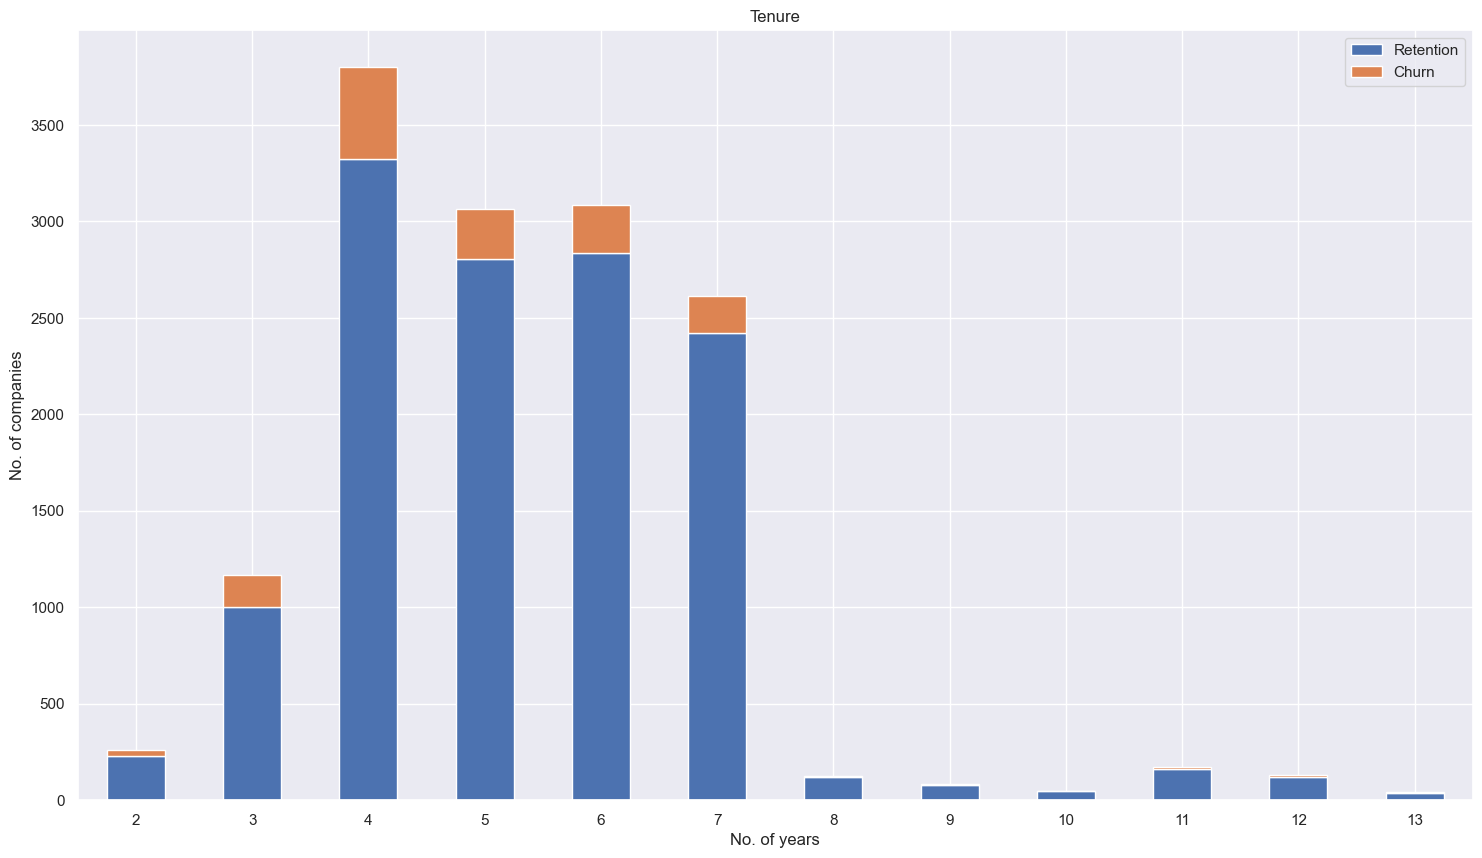

In [12]:
tenure.plot(kind="bar",
                figsize=(18,10),
                stacked=True,
                rot=0,
                title= "Tenure")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of companies")
plt.xlabel("No. of years")
plt.show()

##### We can clearly see that churn is very low for companies which joined recently or that have made the contract a long time ago. With the higher number of churners within the 3-7 years of tenure. we can create from these the data which is indicated by month to get the full insights from it, hence month_activ, months_to_end, months_modif_prod, months_renewal in place of date_active, date_to_end, date_modif_prod and date_renewal
---

In [13]:
import datetime

In [14]:
def year_to_months(referencedate, data, column):
    """
    """
    time = referencedate-data[column]
    months = (time / np.timedelta64(1, "M")).astype(int)
    return months 

In [15]:
reference = datetime.datetime(2016,1,1)
client_df["months_activ"] = year_to_months(reference, client_df, "date_activ")
client_df["months_to_end"] = -year_to_months(reference, client_df, "date_end")
client_df["months_modif_prod"] = year_to_months(reference, client_df, "date_modif_prod")
client_df["months_renewal"] = year_to_months(reference, client_df, "date_renewal")

In [16]:
def plot_churn_by_month(dataframe, column, fontsize_=11):
    """
    Plot churn distribution by monthly variable
    """
    temp = dataframe[[column, "churn", "id"]].groupby([column, "churn"])["id"].count().unstack(level=1)
    temp.plot(kind="bar",
    figsize=(18,10),
    stacked=True,
    rot=0,
    title= column)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc="upper right")
    # Labels
    plt.ylabel("No. of companies")
    plt.xlabel("No. of months")
    # Set xlabel fontsize
    plt.xticks(fontsize=fontsize_)
    plt.show()

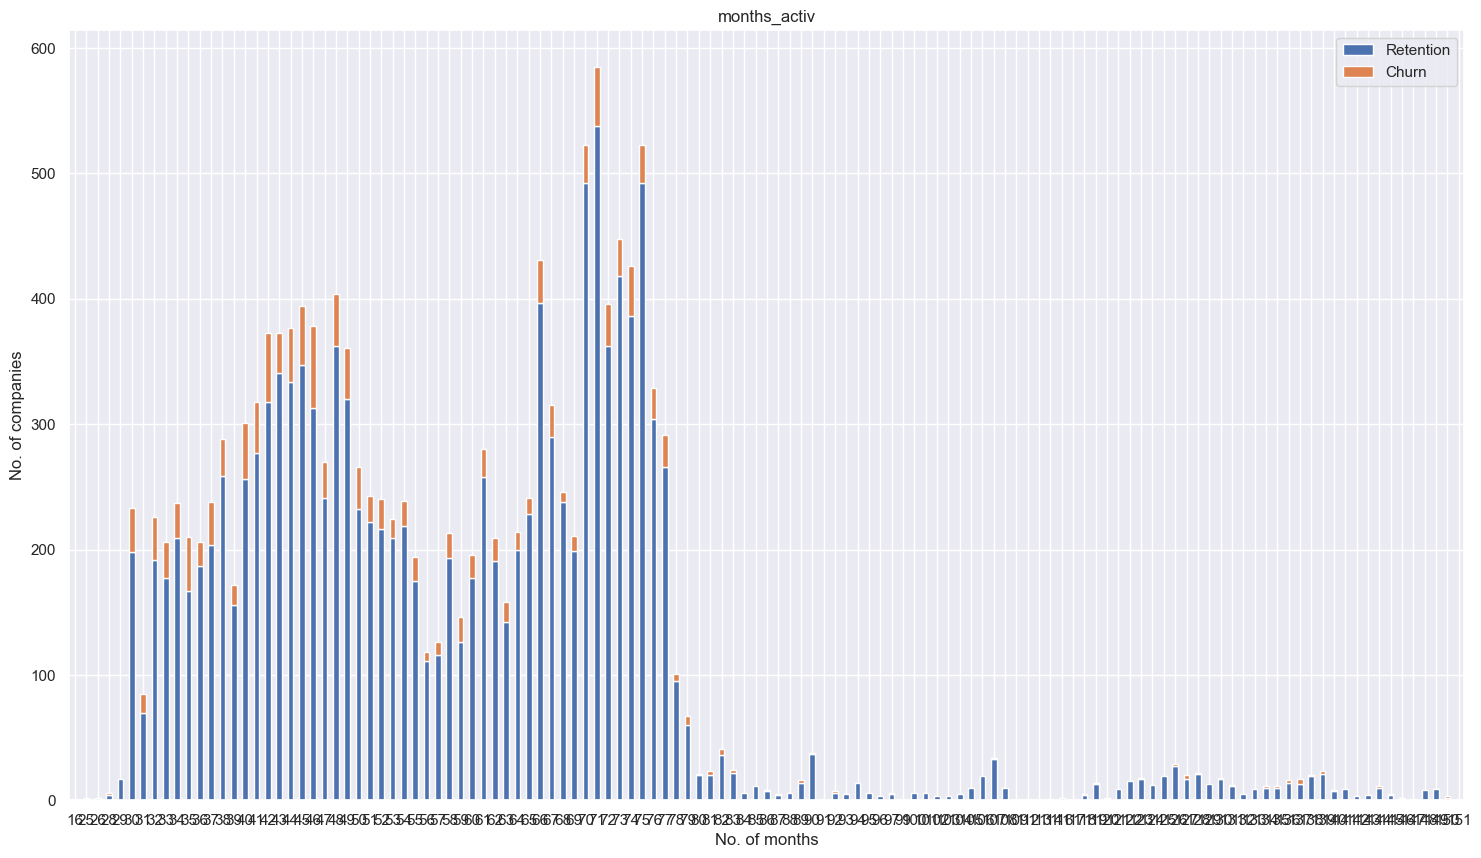

In [17]:
plot_churn_by_month(client_df, 'months_activ', fontsize_=11)

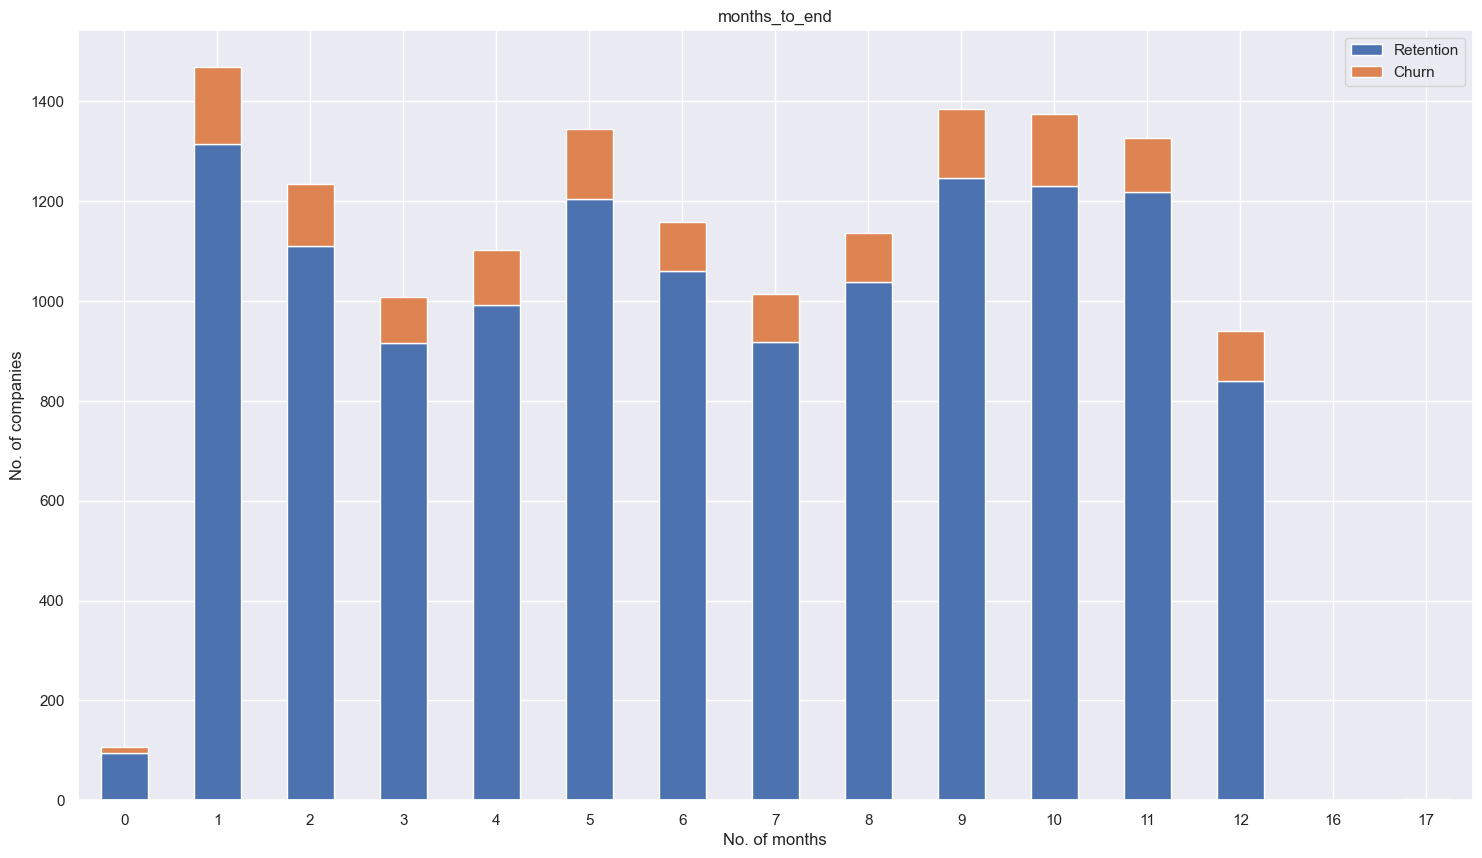

In [18]:
plot_churn_by_month(client_df, "months_to_end", fontsize_=11)

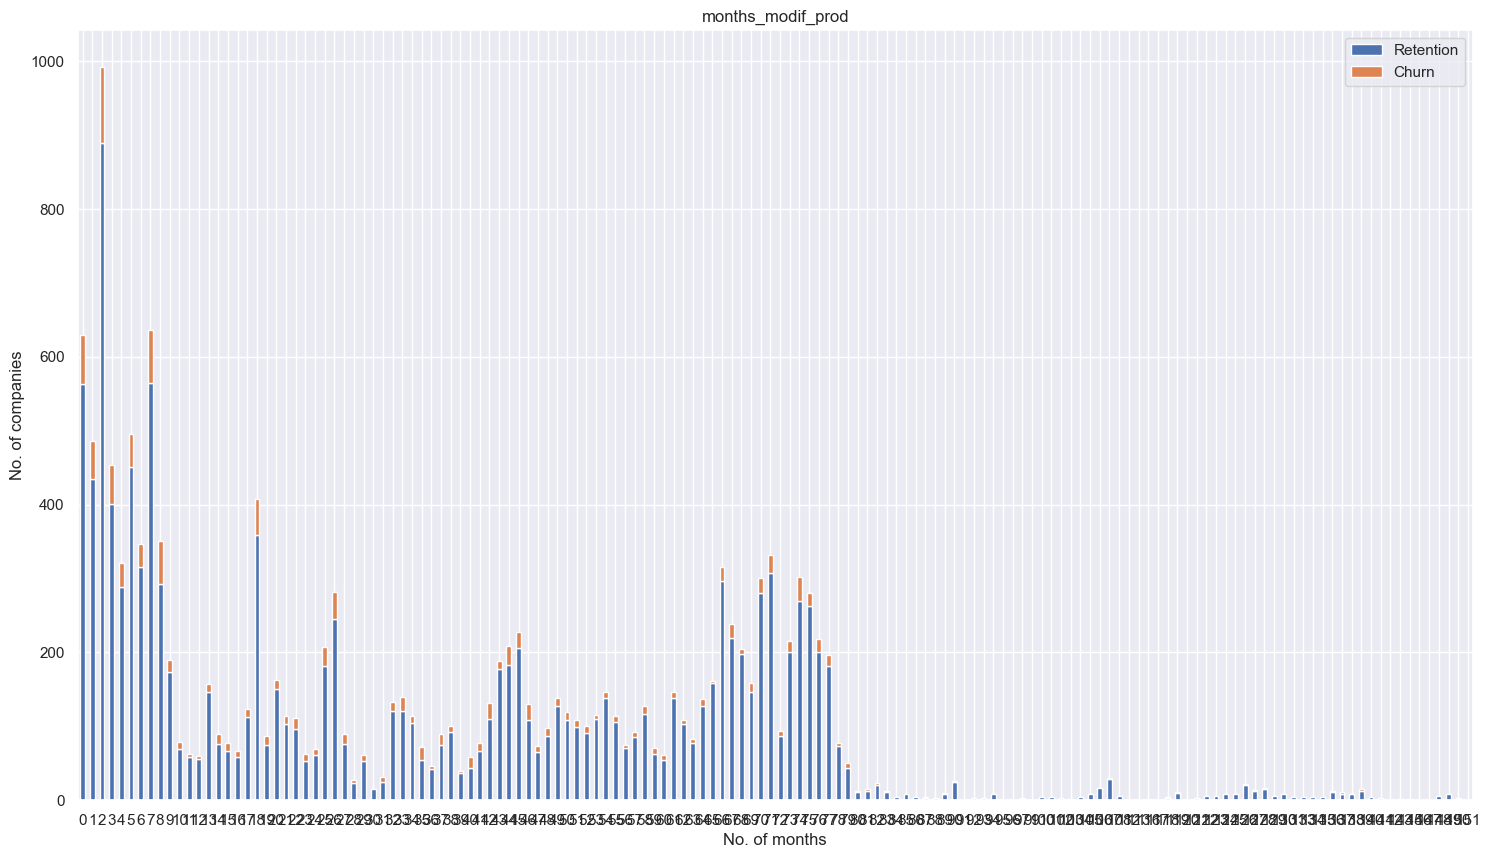

In [19]:
plot_churn_by_month(client_df, "months_modif_prod", fontsize_=11)

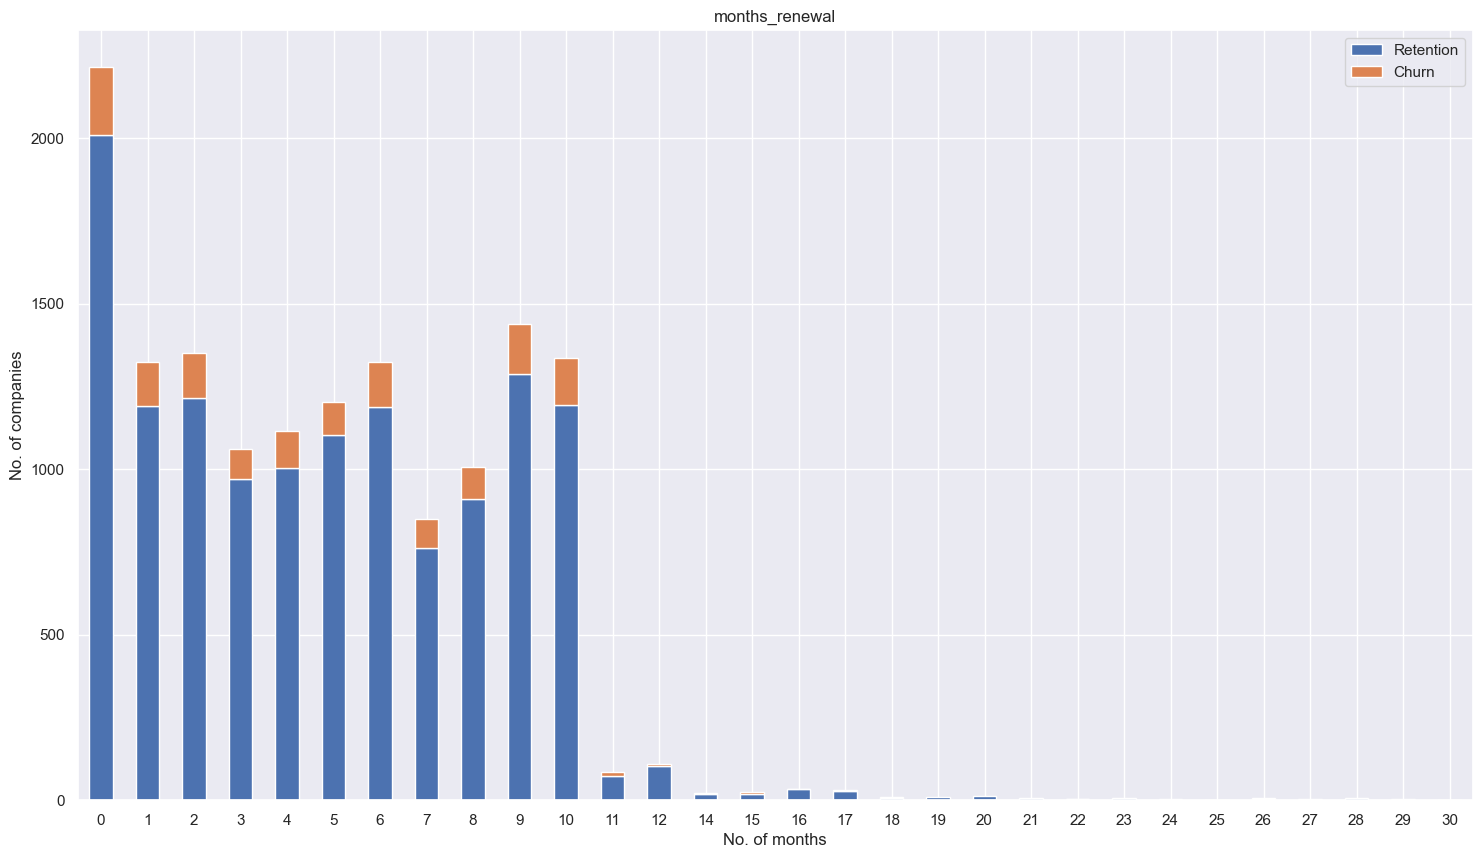

In [20]:
plot_churn_by_month(client_df, "months_renewal", fontsize_=11)

In [21]:
client_df.drop(columns=["date_activ", "date_end", "date_modif_prod", "date_renewal"],inplace=True)

In [22]:
client_df["has_gas"]=client_df["has_gas"].replace(["t", "f"],[1,0])
client_df["channel_sales"] = client_df["channel_sales"].astype("category")

In [23]:
# Create dummy variables
categories_channel = pd.get_dummies(client_df["channel_sales"], prefix = "channel")

In [24]:
# Rename columns for simplicity
categories_channel.columns = [col_name[:11] for col_name in categories_channel.columns]

In [25]:
categories_channel.head(5)

,channel_MIS,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi
0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0


In [26]:
categories_channel.drop(columns=["channel_MIS"],inplace=True)

#### code of the electricity campaign the customer first subscribed to==origin_up

In [27]:
# first convert the column into categorical variables
client_df["origin_up"] = client_df["origin_up"].astype("category")

In [28]:
pd.DataFrame({"Categorical signup": client_df['origin_up'].value_counts()})

,Categorical signup
lxidpiddsbxsbosboudacockeimpuepw,7097
kamkkxfxxuwbdslkwifmmcsiusiuosws,4294
ldkssxwpmemidmecebumciepifcamkci,3148
MISSING,64
usapbepcfoloekilkwsdiboslwaxobdp,2
ewxeelcelemmiwuafmddpobolfuxioce,1


In [29]:
# Create dummy variables
categories = pd.get_dummies(client_df["origin_up"], prefix = "origin")
# Rename columns for simplicity
categories.columns = [col_name[:10] for col_name in categories.columns]

In [30]:
categories

,origin_MIS,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa
0,0,0,0,0,1,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
14601,0,0,0,0,1,0
14602,0,0,0,0,1,0
14603,0,0,0,0,1,0
14604,0,0,0,0,1,0


In [31]:
categories.drop(columns=["origin_MIS"],inplace=True)

#### activity_new = category of the company’s activity

In [32]:
# Use common index to merge
client_df = pd.merge(client_df, categories_channel, left_index=True, right_index=True)
client_df = pd.merge(client_df, categories, left_index=True, right_index=True)

In [33]:
client_df.drop(columns=["channel_sales", "origin_up"],inplace=True)

### Transformation of Dataframe

In [34]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,0.181501,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152,5.317952,58.567301,6.393537,35.464056,4.910516,0.000205,0.061139,0.000137,0.462413,0.126181,0.000753,0.094139,0.000068,0.293989,0.215528,0.485896,0.000137
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,0.385446,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175,1.695866,19.366745,3.513031,30.248229,3.795906,0.014331,0.239594,0.011701,0.498602,0.332065,0.027434,0.292033,0.008274,0.455602,0.411202,0.499818,0.011701
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000,2.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000,4.000000,44.000000,3.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,0.000000,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000,5.000000,57.000000,6.000000,30.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,0.000000,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000,6.000000,71.000000,9.000000,64.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,1.000000,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000,13.000000,151.000000,17.000000,151.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
# Apply log10 transformation
client_df["cons_12m"] = np.log10(client_df["cons_12m"]+1)
client_df["cons_gas_12m"] = np.log10(client_df["cons_gas_12m"]+1)
client_df["cons_last_month"] = np.log10(client_df["cons_last_month"]+1)
client_df["forecast_cons_12m"] = np.log10(client_df["forecast_cons_12m"]+1)
client_df["forecast_cons_year"] = np.log10(client_df["forecast_cons_year"]+1)
client_df["forecast_meter_rent_12m"] = np.log10(client_df["forecast_meter_rent_12m"]+1)
client_df["imp_cons"] = np.log10(client_df["imp_cons"]+1)

/tmp/ipykernel_39746/2144953406.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((client_df["cons_12m"].dropna()), ax=axs[0])
/tmp/ipykernel_39746/2144953406.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((client_df[client_df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
/tmp/ipyk

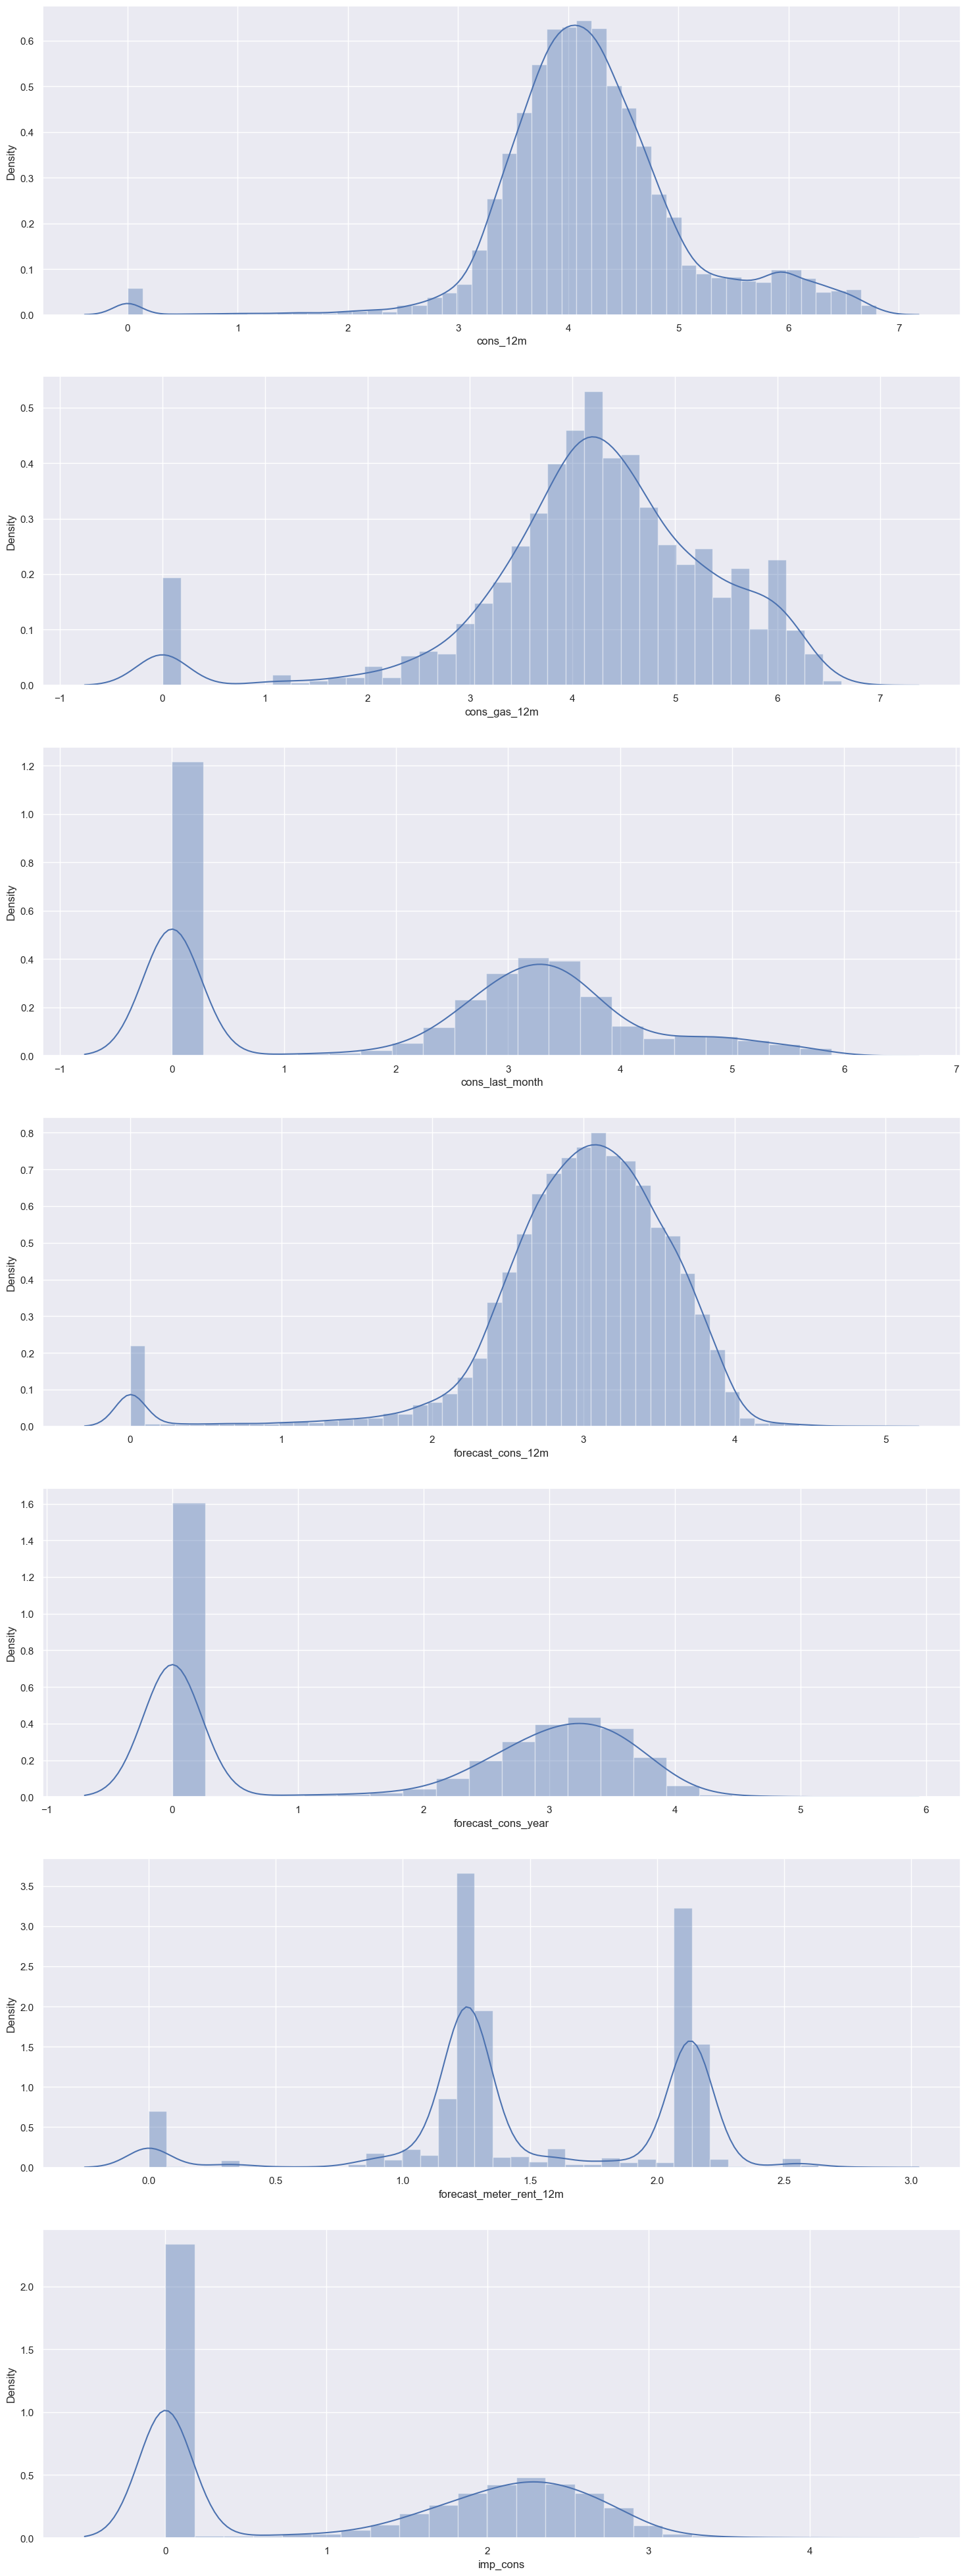

In [36]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot histograms
sns.distplot((client_df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((client_df[client_df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((client_df["cons_last_month"].dropna()), ax=axs[2])
sns.distplot((client_df["forecast_cons_12m"].dropna()), ax=axs[3])
sns.distplot((client_df["forecast_cons_year"].dropna()), ax=axs[4])
sns.distplot((client_df["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.distplot((client_df["imp_cons"].dropna()), ax=axs[6])
plt.show()

In [37]:
# Calculate correlation of variables
correlation = client_df.corr()

/tmp/ipykernel_39746/831513112.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = client_df.corr()


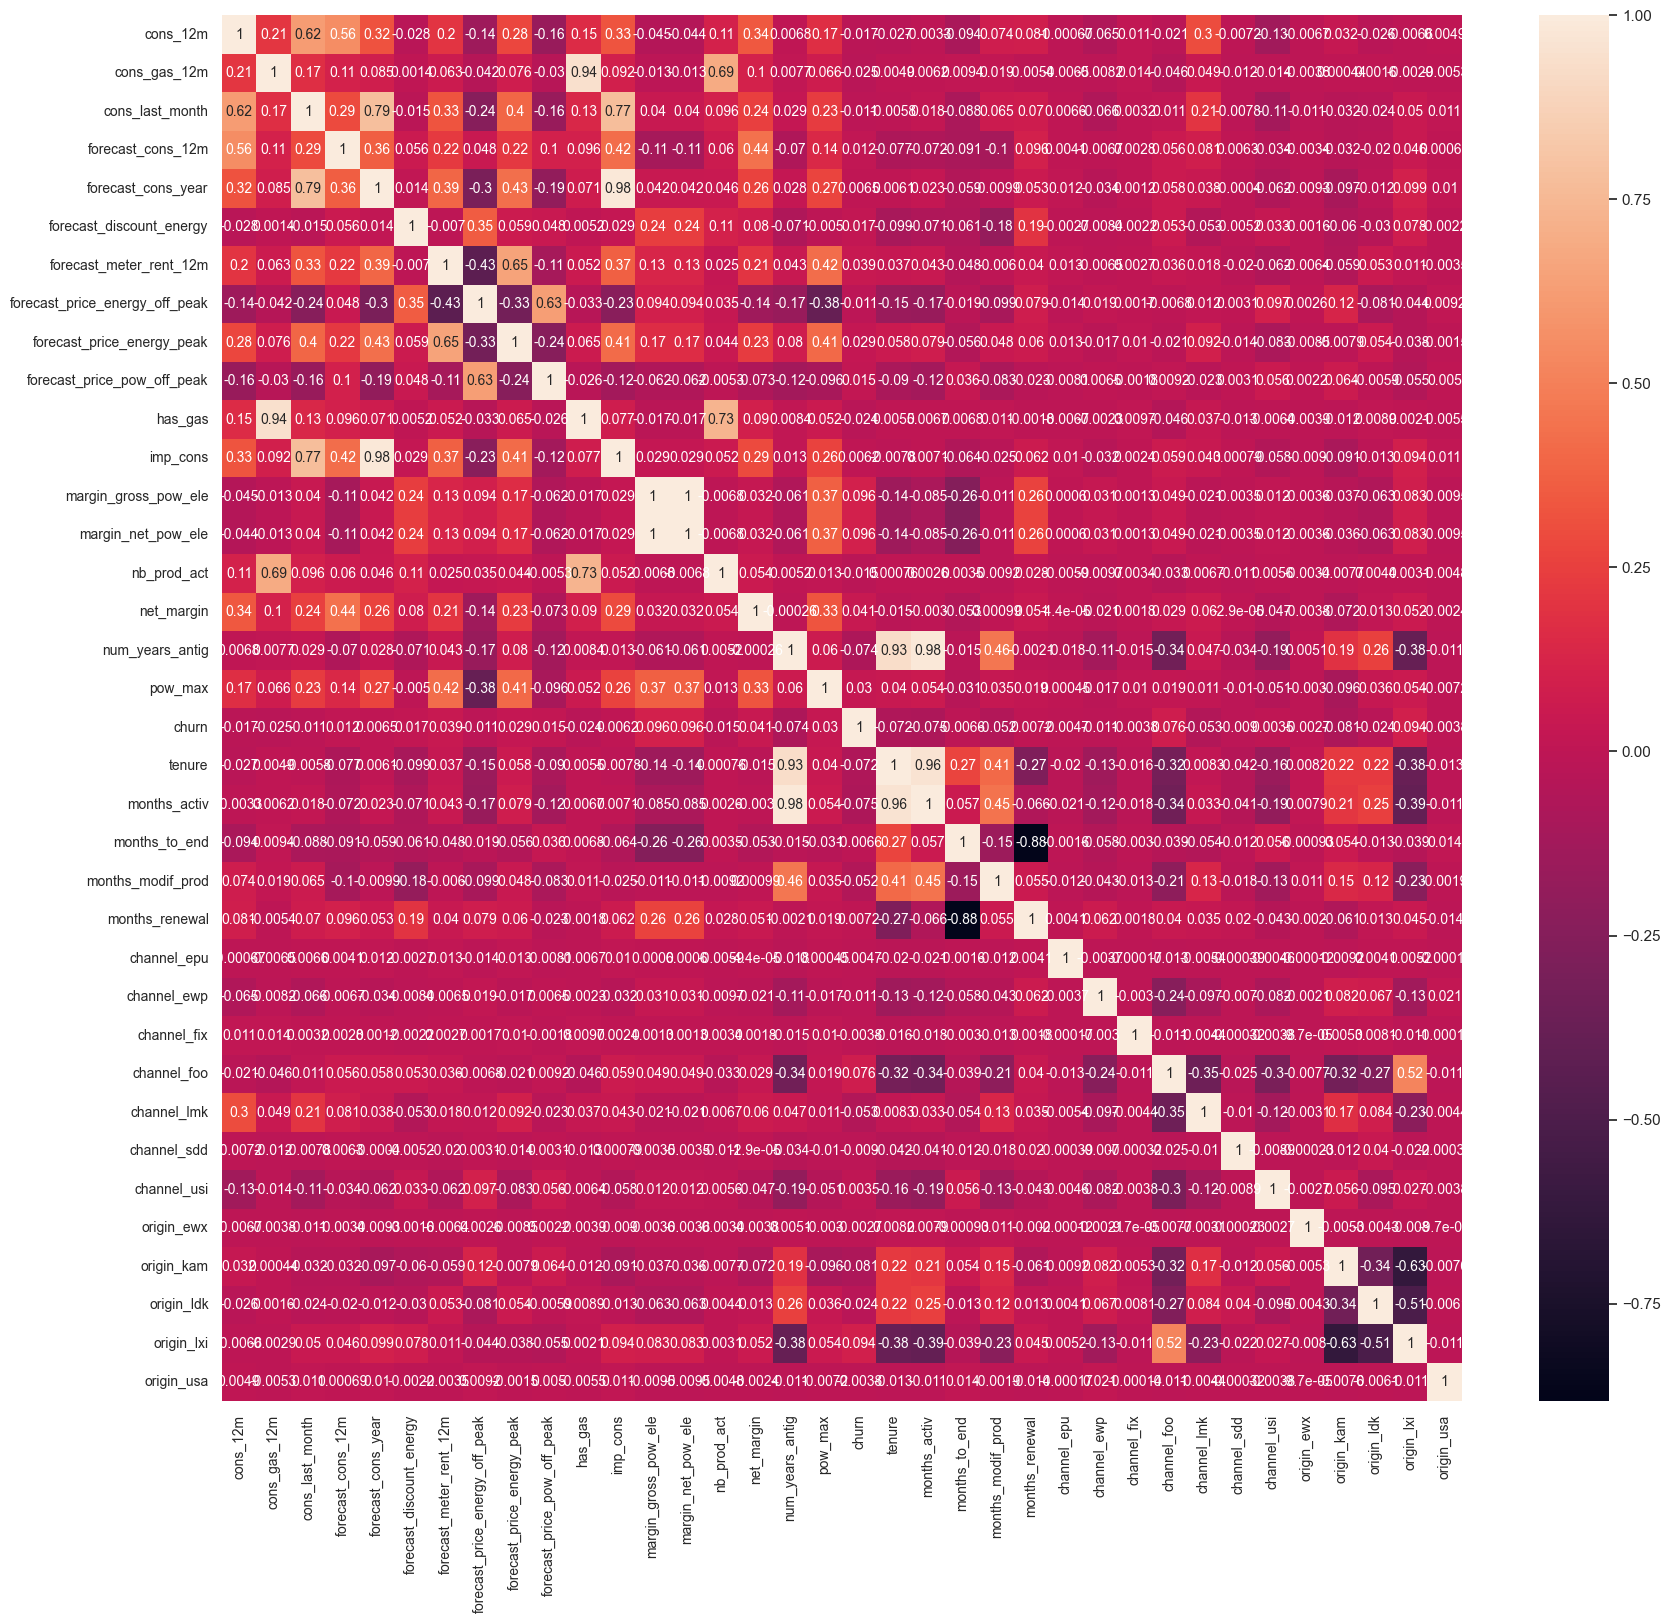

In [38]:
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [39]:
client_df.drop(columns=["num_years_antig", "forecast_cons_year"],inplace=True)

### Remove Outliers

In [40]:
def replace_outliers_z_score(dataframe, column, Z=3):
    """
    Replace outliers with the mean values using the Z score.
    Nan values are also replaced with the mean values.
    Parameters
    ----------
    dataframe : pandas dataframe
    Contains the data where the outliers are to be found
    column : str
    Usually a string with the name of the column
    Returns
    -------
    Dataframe
    With outliers under the lower and above the upper bound removed
    """
    from scipy.stats import zscore
    df = dataframe.copy(deep=True)
    df.dropna(inplace=True, subset=[column])
    # Calculate mean without outliers
    df["zscore"] = zscore(df[column])
    mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()
    # Replace with mean values
    no_outliers = dataframe[column].isnull().sum()
    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe["zscore"] = zscore(dataframe[column])
    dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_
    # Print message
    print("Replaced:", no_outliers, " outliers in ", column)
    return dataframe.drop(columns="zscore")

In [43]:
client_df = replace_outliers_z_score(client_df,"cons_12m")
client_df = replace_outliers_z_score(client_df,"cons_gas_12m")
client_df = replace_outliers_z_score(client_df,"cons_last_month")
client_df = replace_outliers_z_score(client_df,"forecast_cons_12m")
#client_df = replace_outliers_z_score(client_df,"forecast_discount_energy")
client_df = replace_outliers_z_score(client_df,"forecast_meter_rent_12m")
client_df = replace_outliers_z_score(client_df,"forecast_price_energy_off_peak")
client_df = replace_outliers_z_score(client_df,"forecast_price_energy_peak")
client_df = replace_outliers_z_score(client_df,"forecast_price_pow_off_peak")
client_df = replace_outliers_z_score(client_df,"imp_cons")
client_df = replace_outliers_z_score(client_df,"margin_gross_pow_ele")
client_df = replace_outliers_z_score(client_df,"margin_net_pow_ele")
client_df = replace_outliers_z_score(client_df,"net_margin")
client_df = replace_outliers_z_score(client_df,"pow_max")
client_df = replace_outliers_z_score(client_df,"months_activ")
client_df = replace_outliers_z_score(client_df,"months_to_end")
client_df = replace_outliers_z_score(client_df,"months_modif_prod")
client_df = replace_outliers_z_score(client_df,"months_renewal")

Replaced: 0  outliers in  cons_12m
Replaced: 0  outliers in  cons_gas_12m
Replaced: 0  outliers in  cons_last_month
Replaced: 0  outliers in  forecast_cons_12m
Replaced: 0  outliers in  forecast_meter_rent_12m
Replaced: 0  outliers in  forecast_price_energy_off_peak
Replaced: 0  outliers in  forecast_price_energy_peak
Replaced: 0  outliers in  forecast_price_pow_off_peak
Replaced: 0  outliers in  imp_cons
Replaced: 0  outliers in  margin_gross_pow_ele
Replaced: 0  outliers in  margin_net_pow_ele
Replaced: 0  outliers in  net_margin
Replaced: 0  outliers in  pow_max
Replaced: 0  outliers in  months_activ
Replaced: 0  outliers in  months_to_end
Replaced: 0  outliers in  months_modif_prod
Replaced: 0  outliers in  months_renewal


In [44]:
client_df.reset_index(drop=True, inplace=True)

In [45]:
if not os.path.exists(os.path.join("/home/miki/Desktop/Docker/BCG/Customer-Churning-Analysis/data/", "test")):
    os.makedirs(os.path.join("/home/miki/Desktop/Docker/BCG/Customer-Churning-Analysis/data/", "test"))

In [46]:
PICKLE_DATA = os.path.join("/home/miki/Desktop/Docker/BCG/Customer-Churning-Analysis/data/test", "data.pkl")
PICKLE_PRICE= os.path.join("/home/miki/Desktop/Docker/BCG/Customer-Churning-Analysis/data/test", "price.pkl")

In [47]:
pd.to_pickle(client_df, PICKLE_DATA)
pd.to_pickle(price_df, PICKLE_PRICE)